In [1]:
from DataProcessing import DataProcessing
from Models import Models
from Visualization import Visualization

c:\Users\alexa\mambaforge\envs\machinelearning2\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\alexa\mambaforge\envs\machinelearning2\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\alexa\mambaforge\envs\machinelearning2\Lib\site-packages\

# Initialize our main classes
* DataProcessing - This class contains all the filtering and manipulation of the Reuters dataset
* Models - This class handles all the models that will be used and the corresponding scores 
* Visualization - This class provides all the graphs used to visulaize the data 

In [2]:
processData = DataProcessing()
models = Models()
viz = Visualization()

# Process Data
The generation of the data is through the fullGenerate() of our DataProcessing class. It will take the reuter's data and initializing the DataFrame for it, cleaning text in the content and subject, filtering by category threshold, running SVD, and finally running LSA. 

In [3]:
lsa_category = processData.fullGenerate()
lsa_category.head()

,category,0,1,2,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,trade,0.050164,0.037293,-0.000206,0.242958,-0.019272,0.054667,-0.020237,-0.045984,-0.044247,...,-0.007309,-0.002178,0.006345,-0.008980,-0.002225,0.003456,-0.000462,-0.004499,-0.008447,0.002675
1,grain,0.021179,0.014573,-0.001259,0.114500,-0.041549,-0.027533,-0.023974,-0.015297,-0.006084,...,0.003375,0.017792,0.003029,0.011446,0.001735,0.006028,-0.007702,0.007264,-0.002535,-0.006369
2,ship,0.007861,0.044196,0.003081,0.049874,-0.017622,-0.010743,-0.014255,-0.009723,-0.004608,...,-0.001021,0.003088,-0.001145,0.004326,-0.001565,0.001821,-0.009574,-0.009845,0.007450,0.001596
3,gold,0.020350,0.015632,0.002256,0.142950,-0.052360,-0.050752,-0.031432,-0.011660,-0.003360,...,-0.006571,-0.005127,0.004326,-0.010482,0.003327,-0.001957,-0.001341,0.007222,-0.006169,0.011736
4,acq,0.022494,0.047817,-0.000685,0.183775,-0.055545,-0.027384,-0.037570,-0.025359,-0.006172,...,0.006341,0.000379,0.001069,0.002190,0.006162,-0.008176,-0.006678,-0.007382,0.002873,0.002394


# Data Visualization
Here we can visualize the data after it has been processed. 

### Explained variance ratio vs. the number of components
The plot below shows the explained variance ratio vs. the number of components. This allows us to see and understand the trade-off between retaining important information and reducing the dimensionality of a dataset. Through this plot we can surmise an acceptable range in reducing the dimensionality of the dataset.

In [6]:
viz.plot_explained_variance_ratio(counts_tfidf = processData.counts_tfidf, maxComponents = 4502)

### UMAP & T-SNE Visualization
In order to provide a more visual representation of the processed data which has very high dimensionality, we used UMAP and t-SNE to convert them into a lower-dimensional space. This allows us to see the patterns and relationships that might be difficult to discern in the original high-dimensional space.

In [4]:
viz.plot_UMAP_3D( LSA_df = processData.lsa_data_raw, raw_df = processData.finalReuters_df)

In [5]:
viz.plot_TSNE_3D( LSA_df = processData.lsa_data_raw, raw_df = processData.finalReuters_df)

# Data preparation for Modeling
Split the processed data into their respective train and test sets. Here we created two sets of them, one for just a regular split with no modification and another where the 'y' is label encoded. This is done due to some models requiring label encoded data.

In [ ]:
X, y, X_train, X_test, y_train, y_test = processData.splitDataFrame(lsa_category)
X_Encoded, y_Encoded, X_train_Encoded, X_test_Encoded, y_train_Encoded, y_test_Encoded = processData.splitDataFrameEncoded(lsa_category)
nodeCount = y.nunique()
modelResults = {}

# Supervised Models
- This machine learning model is trained using labeled data. This means that the data used to train the model includes both input variables and output variables. The model learns to map the input variables to the output variables by finding patterns and relationships in the labeled data. 

#### Random Forest Classifier

In [8]:
y_pred_RF = models.runRandomForestClassifier(X_train=X_train, y_train=y_train, X_test=X_test)
modelResults['RF'] = models.getScores(y_test=y_test, y_pred=y_pred_RF)

#### Multilayer Perceptron

In [9]:
y_pred_RF = models.runMLP(X_train=X_train, y_train=y_train, X_test=X_test)
modelResults['MLP'] = models.getScores(y_test=y_test, y_pred=y_pred_RF)

#### Linear Classifier

In [10]:
y_pred_CLF = models.runLinearSVC(X_train=X_train, y_train=y_train, X_test=X_test)
modelResults['CLF']  = models.getScores(y_test=y_test, y_pred=y_pred_CLF)

#### XGBoost

In [11]:
y_pred_XGB = models.runXGBoost(X_train=X_train_Encoded, y_train=y_train_Encoded, X_test=X_test_Encoded)
modelResults['XGB'] = models.getScores(y_test=y_test_Encoded, y_pred=y_pred_XGB)

# Unsupervised Models
- This machine learning model that is trained using unlabeled data. This means that the data used to train the model only includes input variables. The model learns to find patterns and relationships in the data without being explicitly told what the output should be. Once the model is trained, it can be used to uncover hidden structures or clusters in the data, or to reduce the dimensionality of the data.

#### K-Means Cluster

In [12]:
y_pred_KMN = models.runKMeans(X=X_Encoded, clusters=len(np.unique(y_Encoded)))
modelResults['KMN'] = models.getScores(y_test=y_Encoded, y_pred=y_pred_KMN)

#### Gaussian Mixed Models

In [13]:
y_pred_GMM = models.runGaussianMixture(X=X_Encoded, components=len(np.unique(y_Encoded)))
modelResults['GMM'] = models.getScores(y_test=y_Encoded, y_pred=y_pred_GMM)

# Model Results
After each run of the models we get the scores for each of their predictive output. The metrics we chose are the following:
* Accuracy 
    - the proportion of correct predictions (true positives and negatives) out of all predictions.
* Normalized Mutual Info 
    - Indicator for clustering performance where it quantifies the mutual information between the predicted and true labels.
* Precision
    - Measures the accuracy of positive predictions by calculating the proportion of true positives out of all positive predictions. 
* Recall
    - Measures the proportion of actual positive instances that are correctly identified by the classifier. 


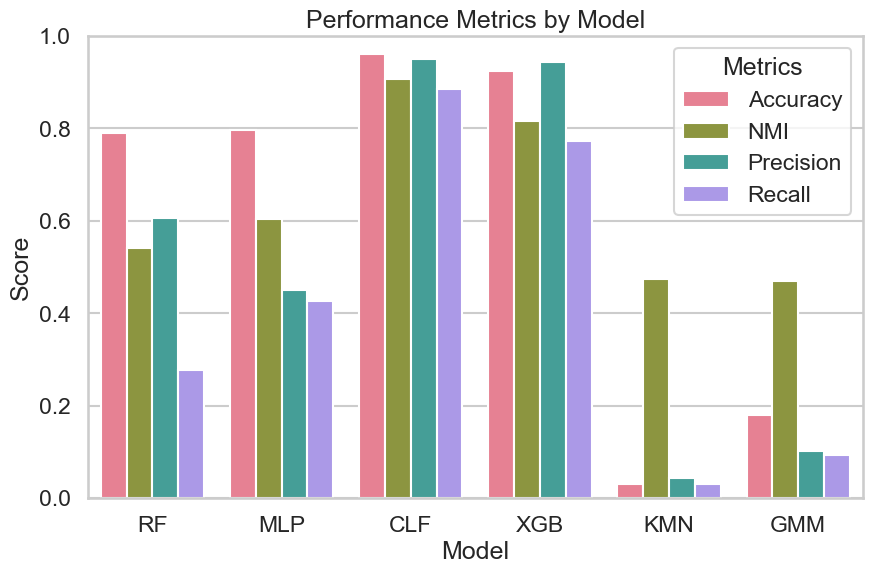

In [14]:
viz.plotMultiBar(modelResults=modelResults, filename="model_performance")

Here we can see on the chart that based on the metrics, supervised models performed very well while the unsupervised did poorly. One thing of note in the results is that the NMI scores for the K-Means Cluster and Gaussian Mixed Models are higher than that of their accuracy, precision and recall. In this scenario the high NMI and low accuracy in an unsupervised learning suggests a disconnect between the structure the model is identifying in the data and the provided labels. This could be due to various reasons, from flaws in the label design to the inherent complexity of the data.

Overall when we talk about accuracy in machine learning models, it's typically in the context of supervised learning, where we know the true labels of our data and can compare the model's predictions to them directly. In unsupervised learning, the goal is often to find some kind of structure or pattern in the data without using explicit labels. 

# Confusion Matrix of Model Predictions

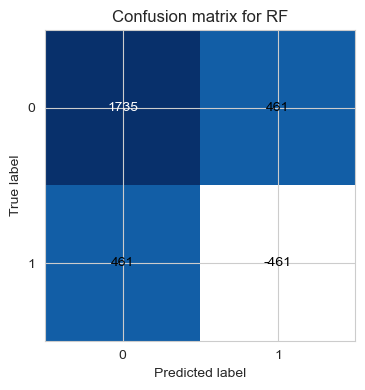

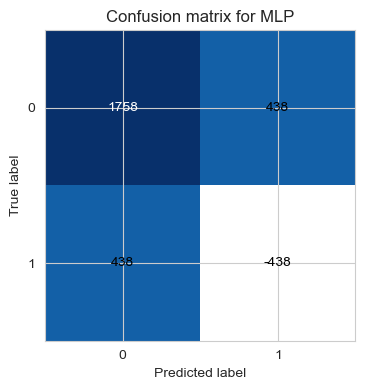

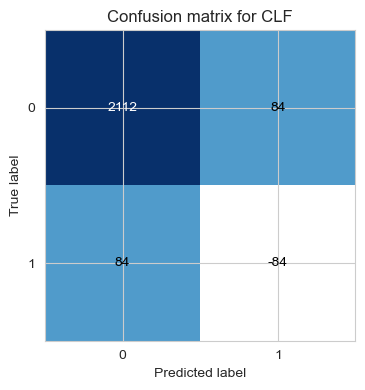

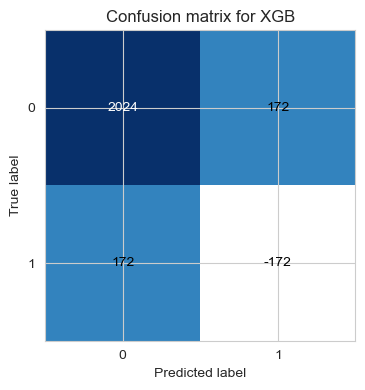

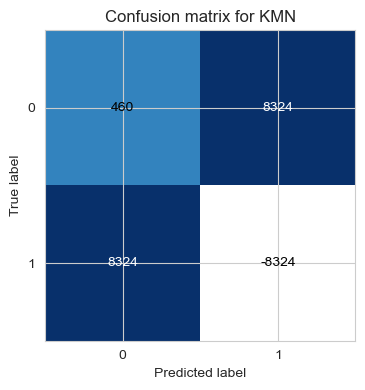

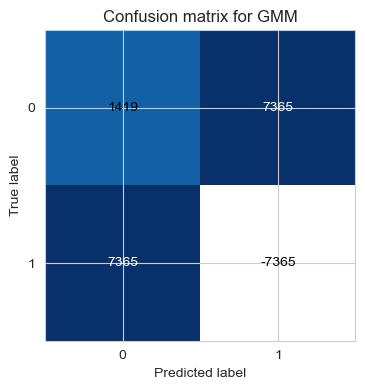

In [26]:
for key, results in modelResults.items():
    viz.plot_confusion_matrix(cm=results['cm4'], title=f"Confusion matrix for {key}", fsize=4)

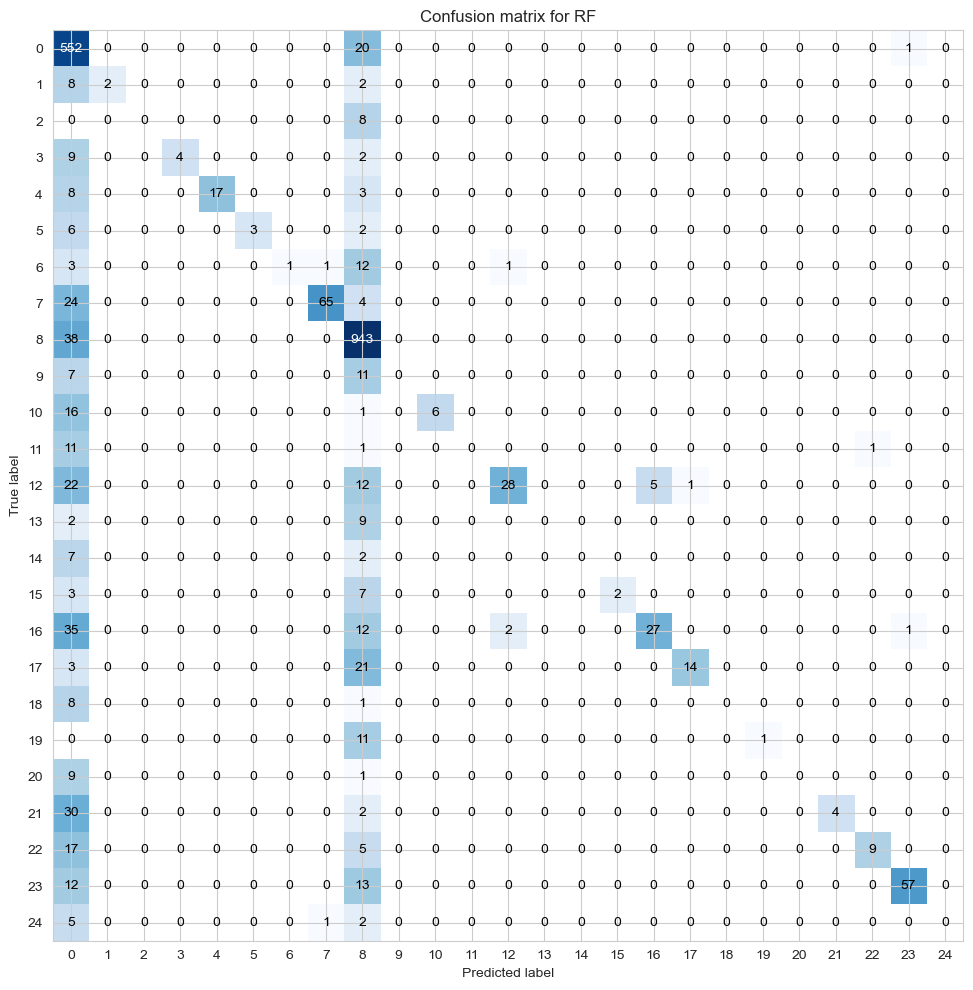

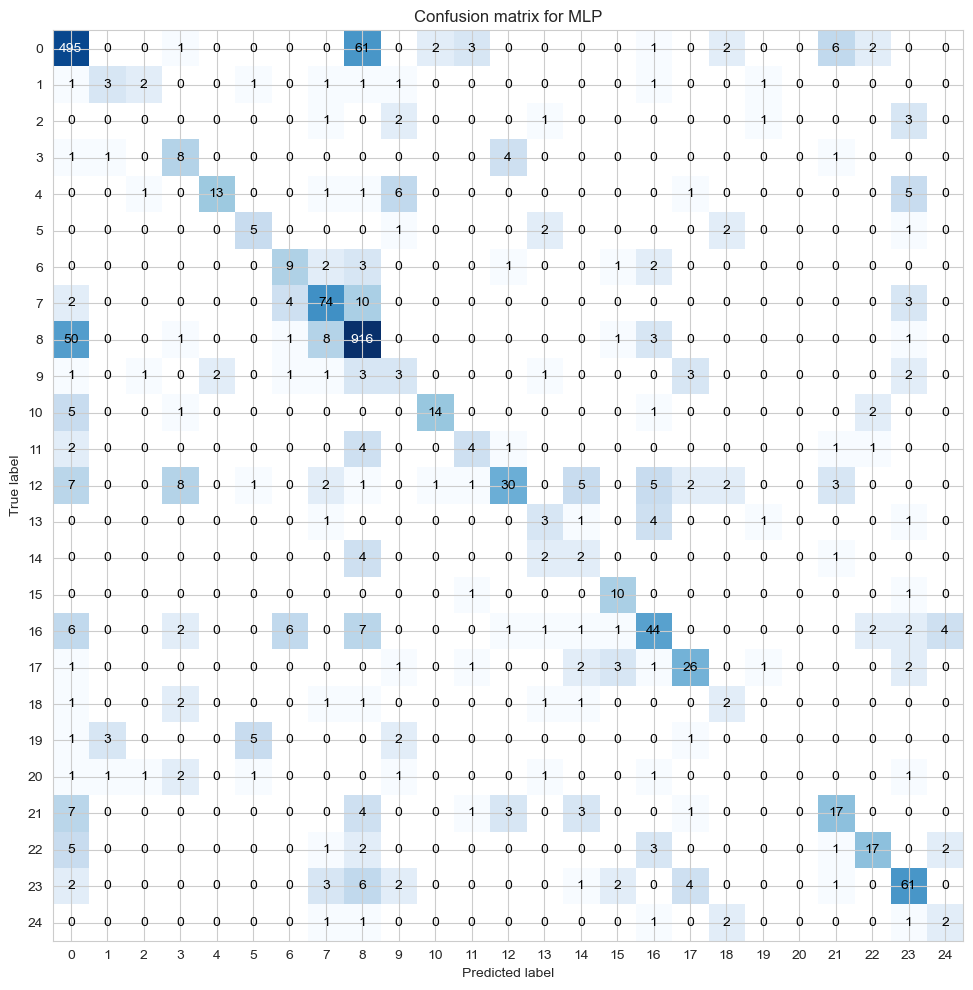

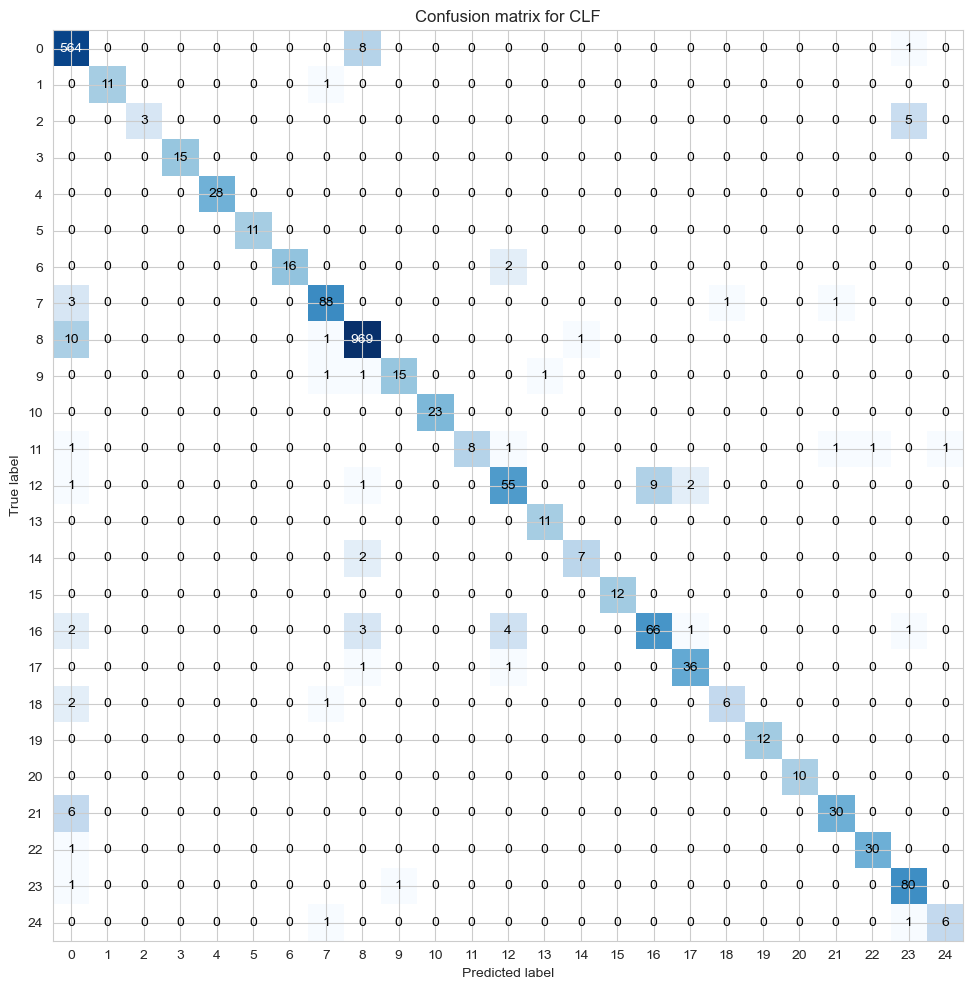

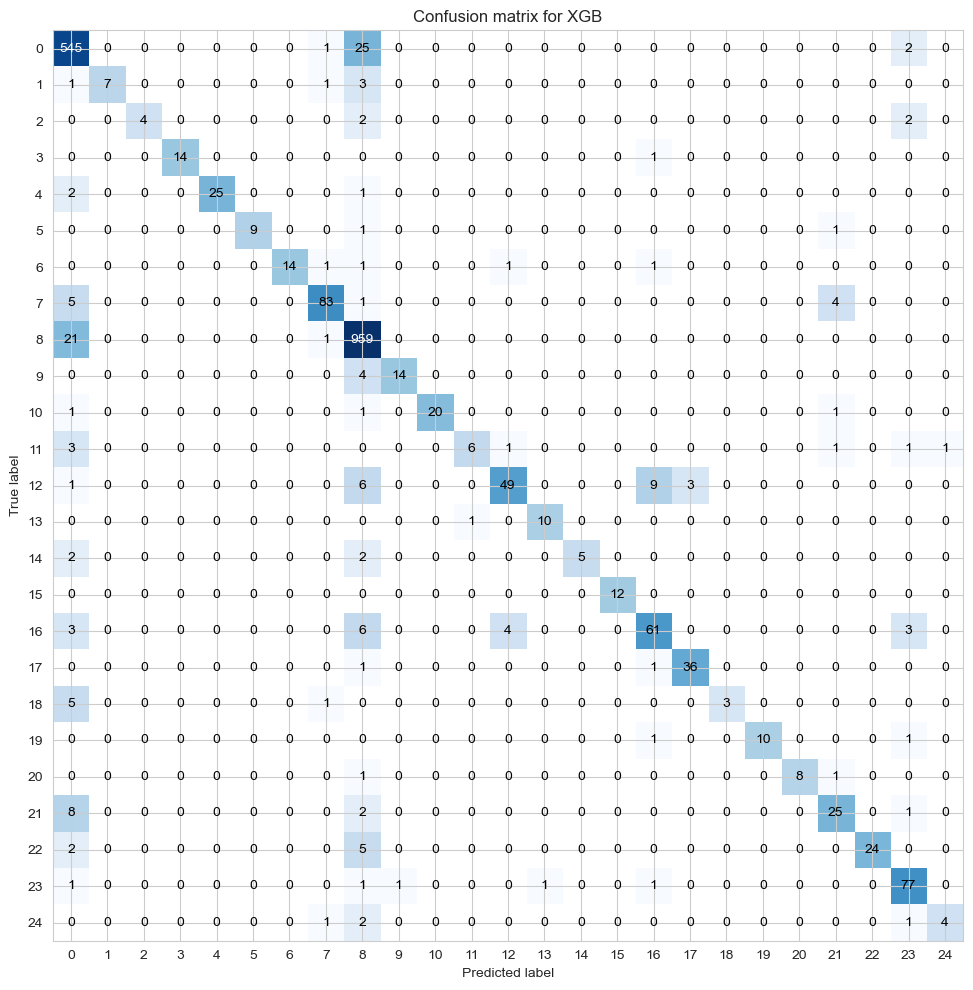

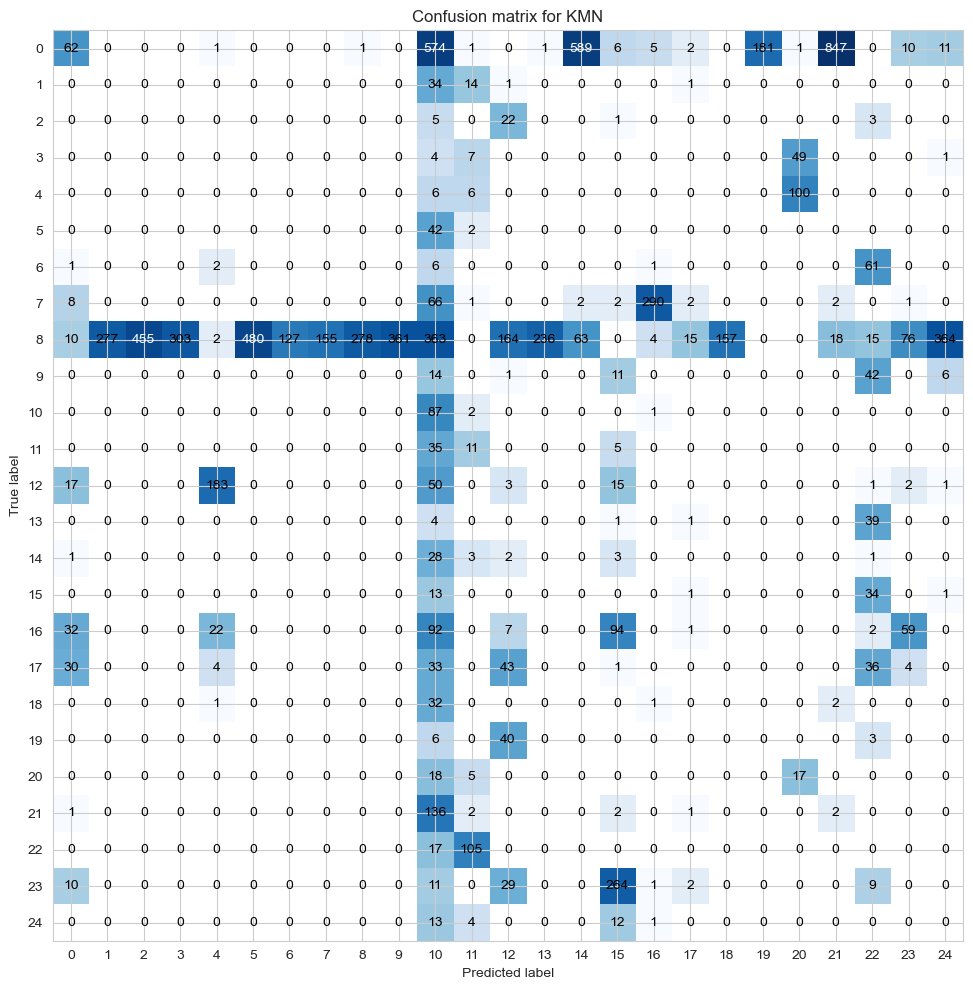

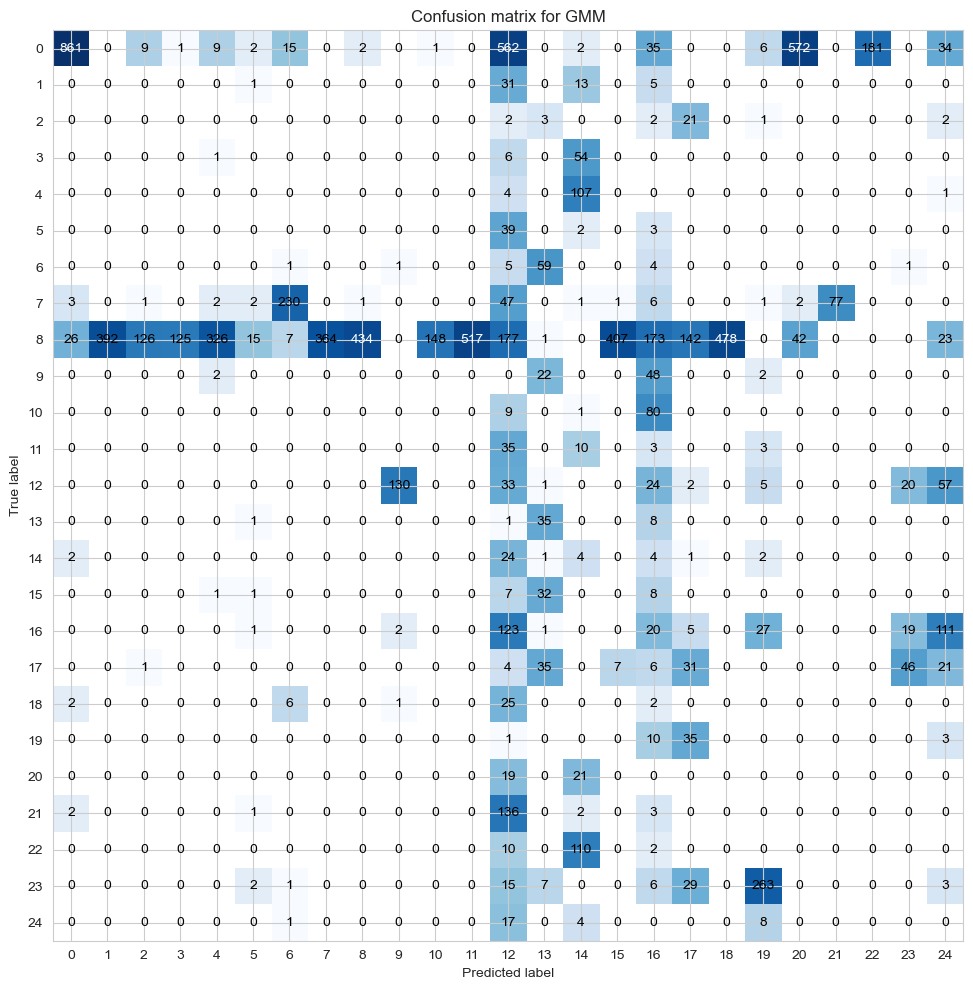

In [16]:
for key, results in modelResults.items():
    viz.plot_confusion_matrix(cm=results['cm'], title=f"Confusion matrix for {key}", filename = f"cm_{key}")